# Store Sales Prediction

**Objective:
Development of this model is to predict the store sales using detail enter by user. Model will determine the sales of the stores.
To find out what role certain properties of an item play and how they affect their sales by understanding Big Mart sales.**

**Benefits:
Gives better insight of customers interest for the item.
Find the store sales
Easy to predict the sales information based on user data.**

# 1.Import Some Important Library

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#read the csv file or read the data
df=pd.read_csv("Train.csv")

In [3]:
#see the 5 row of the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#chek the shape dataset 
df.shape

(8523, 12)

In [5]:
#Summary of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Data validation and Data transformation**
- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the        particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product

**1.COLUMNS TO DO NOT DROP**
- 1)item_weight,
- 2)item_fat_content,
- 3)item_visibility,
- 4)item_type,
- 5)item_mrp,
- 6)outlet_establishment_year
- 7)outlet_size,
- 8)outlet_location_type,
- 9)outlet_type

**2.COLUMNS TO DROP**
- 1)Outlet_Identifier
- 2)Item_Identifier

In [6]:
#drop the columns
df=df.drop(columns=["Outlet_Identifier","Item_Identifier"])

In [7]:
#Check New DataFrame
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
#Stastical Summary Of The Dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### 1.Column Item_Weight

In [9]:
# Check Null Value For Weight Column
df["Item_Weight"].isnull().sum()

1463

- There are 1463 NAN Value  

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

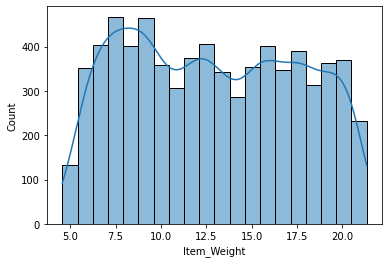

In [10]:
#Histplot For Checking The Distribution Of Weight Column
sns.histplot(df["Item_Weight"],kde=True)

# Obseravation
- **1.nearly mean = mode = median**
- **2.Data is normally distributed**

In [11]:
#Fill The Nan Value With Median
df["Item_Weight"]=df["Item_Weight"].fillna(df["Item_Weight"].median())

<AxesSubplot:>

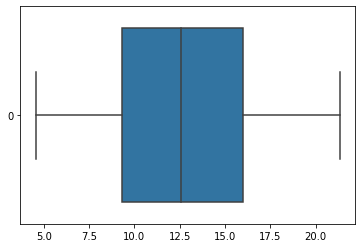

In [12]:
#check for outliers
sns.boxplot(df["Item_Weight"],orient="h")

# Obseravation
- **1.There Is No Ouliers**

In [13]:
df["Item_Weight"].isnull().sum()

0

### 2.column Item_Fat_Content

In [14]:
# Check Null Value For Weight Column
df["Item_Fat_Content"].isnull().sum()

0

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

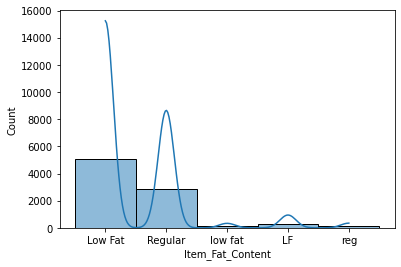

In [15]:
#Histplot For Checking The Distribution Of Weight Column
sns.histplot(df["Item_Fat_Content"],kde=True)

In [16]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].map({'Low Fat':0, 'Regular':1, 'low fat':0, 'LF':0, 'reg':1})

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Density'>

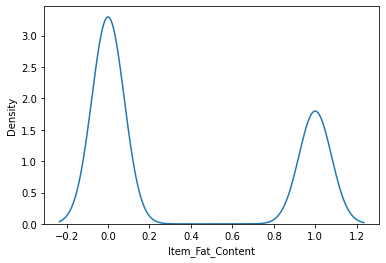

In [17]:
#Check The Distribution Of The Item_Fat_Content Column
sns.kdeplot(df["Item_Fat_Content"])

### 3.Column Item_Type

In [18]:
#Cheack The Null Value
df["Item_Type"].isnull().sum()

0

In [19]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [20]:
#Label Encoding for Item type
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Item_Type"]=encoder.fit_transform(df["Item_Type"])

In [21]:
df["Item_Type"][0:5]

0     4
1    14
2    10
3     6
4     9
Name: Item_Type, dtype: int32

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 632.7+ KB


### 4.columns :Outlet_Size,	Outlet_Location_Type,	Outlet_Type

In [23]:
#Outlet_Size	Outlet_Location_Type	Outlet_Type
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [24]:
#Label Encoding for Outlet_Size || Outlet_Location_Type || Outlet_Type
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Outlet_Size']=encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=encoder.fit_transform(df['Outlet_Type'])

In [25]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,3,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int32  
 7   Outlet_Location_Type       8523 non-null   int32  
 8   Outlet_Type                8523 non-null   int32  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(4), int64(2)
memory usage: 532.8 KB


In [27]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,3,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


# Save The Clean File In CSV Formate 

In [28]:
df.to_csv("Clean_Sales_Price_Prection.csv",index=False)

# Load The Clean Dataset

In [29]:
Clean_df=pd.read_csv("Clean_Sales_Price_Prection.csv")

In [30]:
Clean_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,3,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [31]:
X=Clean_df.drop('Item_Outlet_Sales',axis=1)
y=Clean_df['Item_Outlet_Sales'].values
# import numpy as np
# y = np.asarray(Clean_df['Item_Outlet_Sales'])

In [32]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,1999,1,0,1
3,19.200,1,0.000000,6,182.0950,1998,3,2,0
4,8.930,0,0.000000,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,2002,3,1,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2


In [33]:
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

# Spliting Of Data

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape,y_train.shape

((6818, 9), (6818,))

In [36]:
X_test.shape,y_test.shape

((1705, 9), (1705,))

# Model Building

In [37]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
X_train=Sc.fit_transform(X_train)
X_test=Sc.transform(X_test)

In [38]:
X_train

array([[-0.78945628,  1.34421592, -0.60070308, ..., -0.74584583,
        -1.38348228, -0.25948864],
       [ 1.22142058, -0.74392811, -0.36215854, ...,  1.27528965,
        -0.14965858, -0.25948864],
       [ 1.12679108,  1.34421592,  0.19493285, ...,  0.26472191,
        -1.38348228, -0.25948864],
       ...,
       [ 1.12679108, -0.74392811, -0.91693149, ...,  1.27528965,
        -0.14965858, -0.25948864],
       [ 1.77736889, -0.74392811, -0.22818684, ...,  1.27528965,
        -0.14965858, -0.25948864],
       [ 0.8310739 , -0.74392811, -0.95485942, ...,  0.26472191,
        -1.38348228, -0.25948864]])

In [39]:
X_test

array([[ 0.34609771, -0.74392811, -0.77388703, ..., -1.75641357,
         1.08416512, -0.25948864],
       [-1.16087706, -0.74392811,  0.09797779, ...,  0.26472191,
        -1.38348228, -0.25948864],
       [ 0.39341246,  1.34421592, -0.48194218, ..., -0.74584583,
        -1.38348228, -0.25948864],
       ...,
       [ 0.39341246,  1.34421592, -0.48385674, ..., -1.75641357,
         1.08416512, -0.25948864],
       [-0.71848415,  1.34421592,  1.46010317, ..., -0.74584583,
         1.08416512,  0.9908248 ],
       [-1.16679141, -0.74392811, -0.21387994, ...,  1.27528965,
        -0.14965858, -0.25948864]])

In [40]:
y_train

array([2386.2272, 3103.9596, 1125.202 , ..., 6145.334 , 1649.8524,
        965.41  ])

In [41]:
y_test

array([1743.0644,  356.8688,  377.5086, ...,  629.181 ,  253.004 ,
        976.7286])

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [43]:
y_pred = knn.predict(X_test)
print(y_pred)

[2220.443  1366.2216  856.8846 ...  898.83   1155.8288 1133.8574]


In [44]:
X_test[0]

array([ 0.34609771, -0.74392811, -0.77388703, -0.5400713 , -0.99890847,
       -1.29324011, -1.75641357,  1.08416512, -0.25948864])

In [45]:
import pickle
pickle.dump(Sc,open('Sc.pkl','wb'))
pickle.dump(knn,open('knn.pkl','wb'))

In [46]:
model=pickle.load(open("knn.pkl","rb"))

In [47]:
model.predict(X_test)

array([2220.443 , 1366.2216,  856.8846, ...,  898.83  , 1155.8288,
       1133.8574])